# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months, and management would like your help designing a tool to assist these junior employees.

To start with, they would like you to work with the Toyota specialist to test your idea(s). They have collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the head of sales in a 10 minute presentation. The head of sales has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

## Part 0: Setup enviornment and load data


In [ ]:
# import library and model

# Data manipulation
import pandas as pd
import numpy as np

# Visualizaiton
%matplotlib notebook
%matplotlib inline
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pylab as pylab
sns.set()

# Regressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Model support functions
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', None) # showing entire columns

sns.set_theme(style="whitegrid")
params = {'legend.fontsize': 'x-large',
         'figure.figsize': (15, 5),
         'axes.labelsize': 16,
         'axes.titlesize':'x-large',
         'xtick.labelsize':12,
         'ytick.labelsize':12}
pylab.rcParams.update(params)

# set up the table enviornment showing entire columns
pd.set_option('display.max_rows', None)

Let's read the dataset 'toyota.csv'

In [ ]:
car_sale = pd.read_csv('data/toyota.csv')

# Part 1: DATA PREPARATION

## Part 1.1: Understand the Raw Dataset

### Part 1.1.1: Type of variables

In [ ]:
# data shape

print("The dataset has {} rows.".format(car_sale.shape[0]))
print("The dataset has {} columns.".format(car_sale.shape[1]))

The dataset has 6738 rows.
The dataset has 9 columns.


In [ ]:
car_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
# check missing values

car_sale.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Summary:
* There are 6738 entires.
* 6 columns numeric type.
* 3 columns categorical type.
* There are not any null number.
* Output: price.

### Part 1.1.2: Check duplicated

In [ ]:
duplicateRow = car_sale[car_sale.duplicated()]

duplicateRow

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
178,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
286,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
397,RAV4,2016,17495,Automatic,58100,Hybrid,20,55.4,2.5
398,RAV4,2017,16295,Manual,34633,Diesel,125,60.1,2.0
446,RAV4,2014,10999,Manual,57942,Diesel,145,53.0,2.0
459,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
460,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
764,RAV4,2016,18795,Automatic,57000,Hybrid,20,55.4,2.5
1178,Yaris,2016,10495,Automatic,33705,Hybrid,0,86.0,1.5
1414,Yaris,2016,9495,Automatic,26191,Petrol,30,58.0,1.3


In [ ]:
car_sale.drop([459, 4283, 4516, 5488], axis = 0, inplace = True)

duplicateRows_drop = car_sale[car_sale.duplicated()]
car_sale.shape

(6734, 9)

The duplicated function tells there are 39 duplicated files. After going through these files, I decide to drop four duplicated files. Now, dataset has 6374 entries. 

## Part 1.2 Understand the features

### Part 1.2.1: Price and the age of car.

<Figure size 8280x360 with 0 Axes>

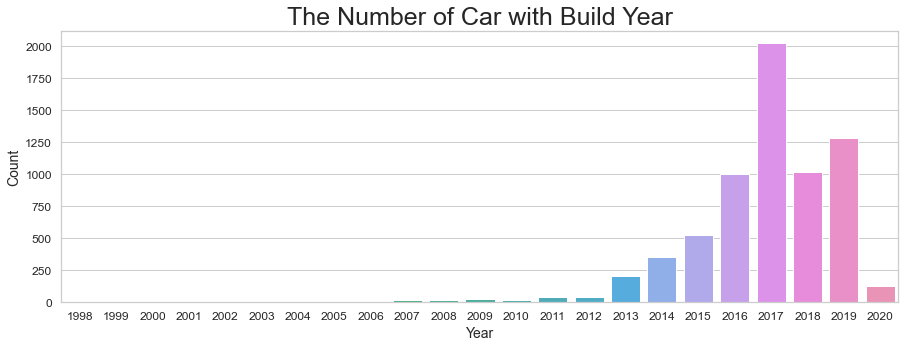

<Figure size 8280x360 with 0 Axes>

In [ ]:
# Fig showing the number of car listed for sold based on year of manufacture.

build_year_table = car_sale.groupby(['year'])['year'].count().reset_index(name='count')

ax = sns.barplot(x='year', y = 'count', data = build_year_table)
ax.axes.set_title("The Number of Car with Build Year",fontsize=25)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.figure(figsize=(115,5))

Text(0, 0.5, 'Percentage')

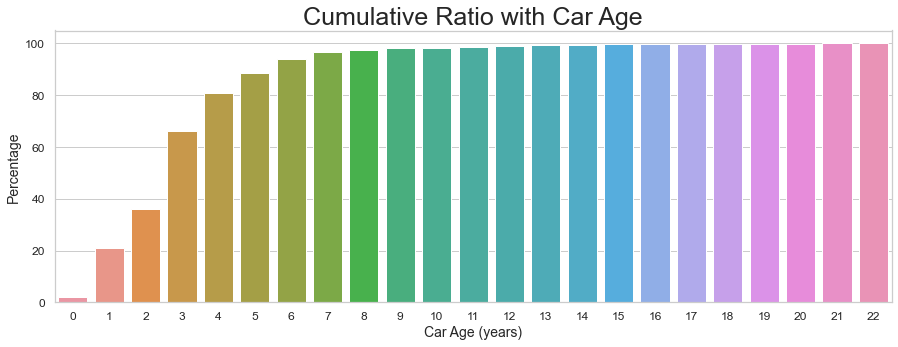

In [ ]:
# The accumulative percentage of car based on how long car has been used. 
build_age_table = build_year_table.sort_values(by='year', ascending = False)
build_age_table['age'] = 2020 - build_year_table['year']
build_age_table['cum_percent'] = 100 * (build_age_table['count'].cumsum()/build_age_table['count'].sum())
build_age_table

ax = sns.barplot(x='age', y = 'cum_percent', data = build_age_table)
ax.axes.set_title("Cumulative Ratio with Car Age",fontsize=25)
plt.xlabel('Car Age (years)', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

Text(0, 0.5, 'Price')

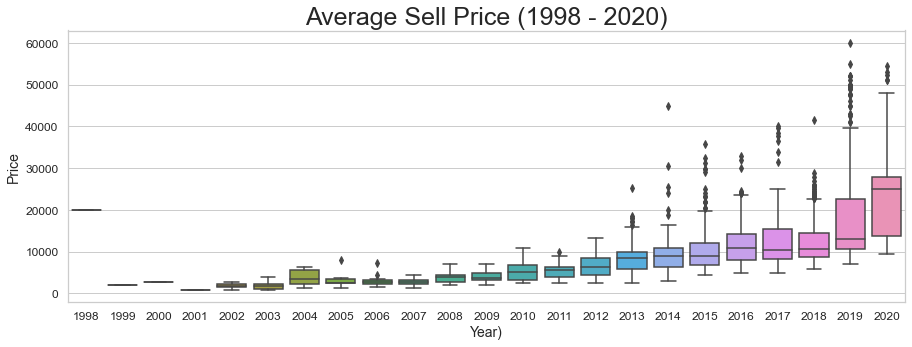

In [ ]:
ax = sns.boxplot(x='year', y='price', data = car_sale)
ax.axes.set_title("Average Sell Price (1998 - 2020)",fontsize=25)
plt.xlabel('Year)', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Summary of the age of car:

* The dataset includes 6,738 cars which build in from 1998 - 2020.
* 88.6% cars are build in recent 5 years.
* 'New' cars are more expensive than 'Old' cars.
* There is one car build in 1998, and price is higher than most years.

Text(0, 0.5, 'Price')

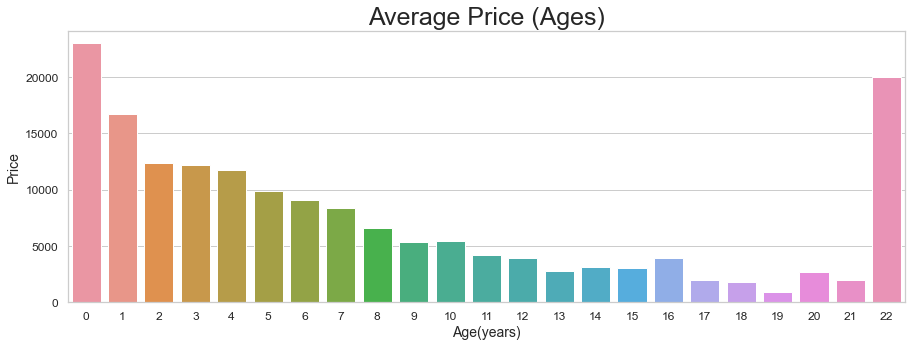

In [ ]:
# Fig showing the average price of car sold from 1998 to 2020

price_age_table = car_sale.groupby('year').mean().reset_index()
price_age_table = price_age_table.sort_values(by='year', ascending = False)
price_age_table['age'] = 2020 - price_age_table['year']


ax = sns.barplot(x='age', y='price', data = price_age_table)
ax.axes.set_title("Average Price (Ages)",fontsize=25)
plt.xlabel('Age(years)', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

### Part 1.2.2: Total number and Price based on model

Text(0, 0.5, 'Count')

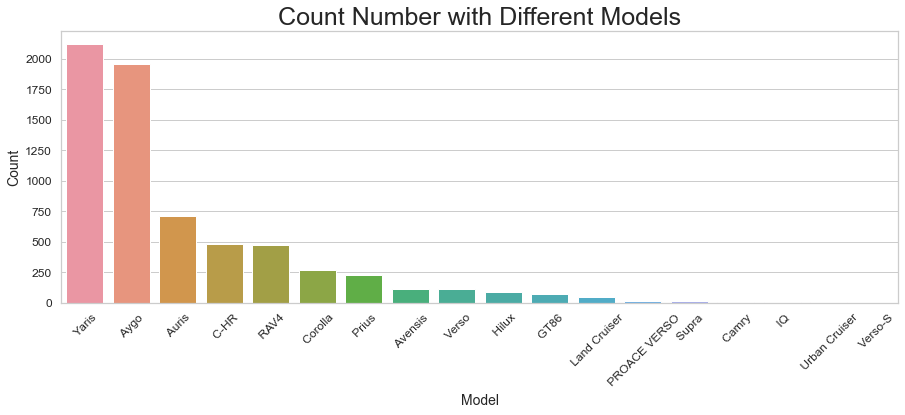

In [ ]:
# Fig showing the number of car based on Toyota model.

model_table = car_sale.groupby(['model'])['model'].count().reset_index(name='count')
model_table = model_table.sort_values(by='count', ascending=False)

ax = sns.barplot(x='model', y = 'count', data = model_table)
ax.axes.set_title("Count Number with Different Models",fontsize=25)
plt.xticks(rotation=45)
plt.xlabel('Model', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

In [ ]:
model_order = model_table['model'].to_list()

Text(0, 0.5, 'Percentage')

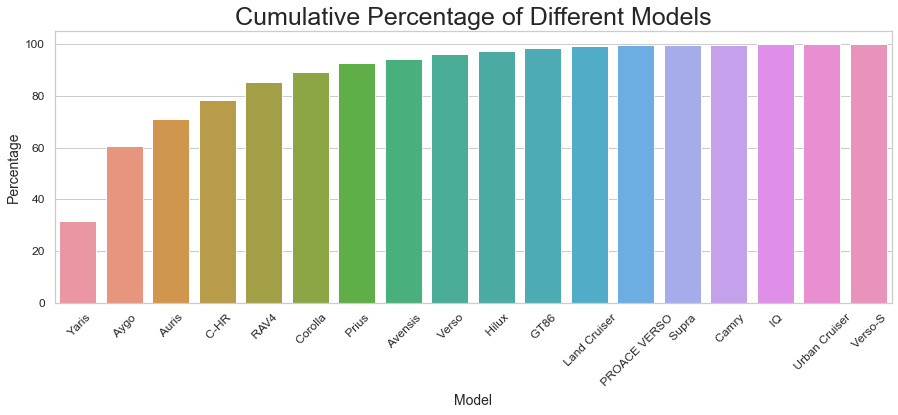

In [ ]:
model_table['cum_percent'] = 100 * (model_table['count'].cumsum()/model_table['count'].sum()) 

ax = sns.barplot(x='model', y = 'cum_percent', data = model_table, order = model_order)
ax.axes.set_title("Cumulative Percentage of Different Models",fontsize=25)
plt.xticks(rotation=45)
plt.xlabel('Model', fontsize = 14)
plt.ylabel('Percentage', fontsize = 14)

Text(0, 0.5, 'Price')

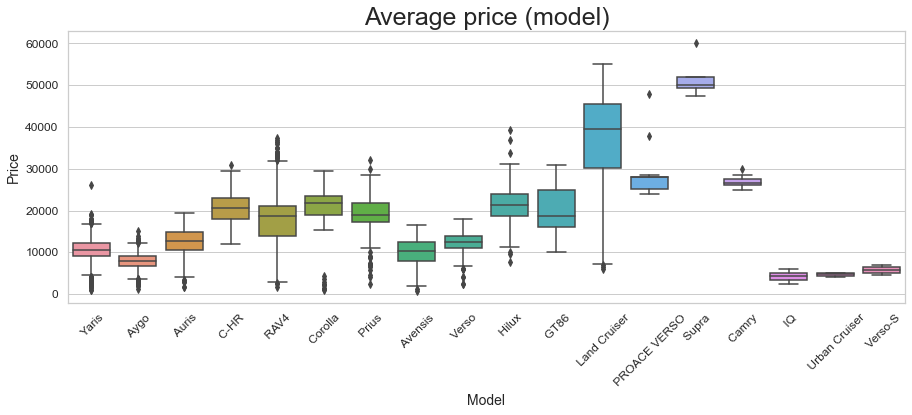

In [ ]:
ax = sns.boxplot(x='model', y='price', data = car_sale, order = model_order)
ax.axes.set_title("Average price (model)",fontsize=25)
plt.xticks(rotation=45)
plt.xlabel('Model', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Summary of car model analysis:

* Top 6 popular models including Yaris, Argo, Auris, C-HR, RAV4, Prius account for 89.3% percent car. 
* Top three models (Yaris, Aygo, and Auris) covers 71.2% for total number and the price of these three models is around £10,000.

### Part 1.2.3: Total number and Price based on fuel type.

In [ ]:
car_sale['fuelType'].value_counts()

Petrol    4084
Hybrid    2043
Diesel     502
Other      105
Name: fuelType, dtype: int64

<AxesSubplot:title={'center':'Percentage (Fuel Type)'}, ylabel='fuelType'>

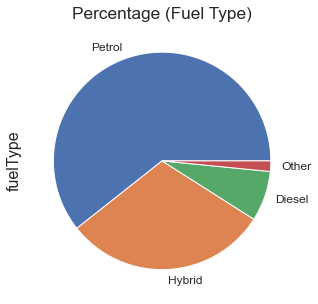

In [ ]:
car_sale['fuelType'].value_counts().plot(kind='pie', title = 'Percentage (Fuel Type)')

Text(0, 0.5, 'Price')

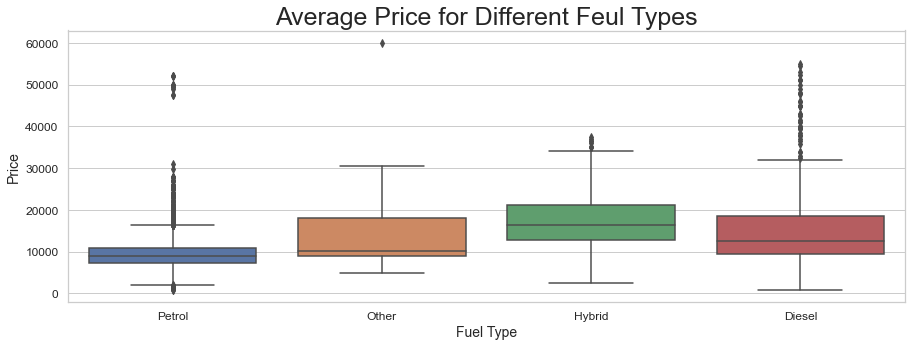

In [ ]:
ax = sns.boxplot(x='fuelType', y='price',  data = car_sale)
ax.axes.set_title("Average Price for Different Feul Types",fontsize=25)
plt.xlabel('Fuel Type', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Summary of feul type analysis:

* 60.6% cars in the dataset are petrol cars.
* Hybrid cars are most expensive.

### Part 1.2.4: Total number and Price based on transmission.

In [ ]:
car_sale['transmission'].value_counts()

Manual       3822
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

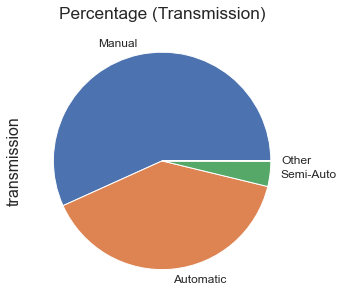

In [ ]:
car_sale['transmission'].value_counts().plot(kind='pie', title = 'Percentage (Transmission)')
plt.rcParams["figure.figsize"] = (15, 5)

Text(0, 0.5, 'Price')

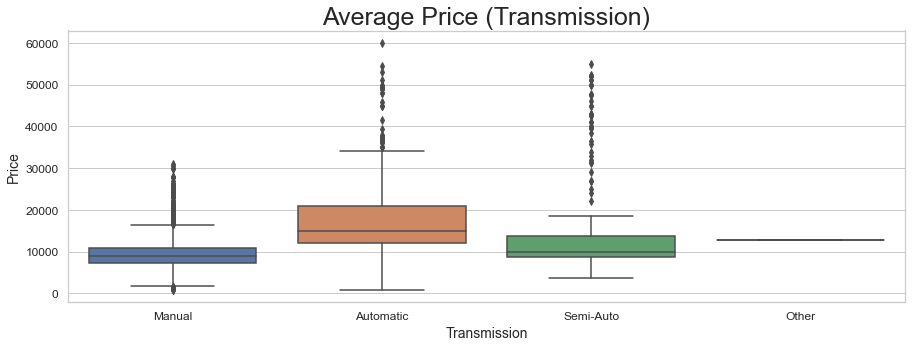

In [ ]:
ax = sns.boxplot(x='transmission', y='price', data = car_sale)
ax.axes.set_title("Average Price (Transmission)",fontsize=25)
plt.xlabel('Transmission', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Summary of transmission analysis:

* Automatic cars are more costly.
* 56.8% cars in the dataset are manual transmission vehicles.
* One record shows Other for transmission, we will double check it in the following data clean.

## Part: 1.3: Exploratory Data Analysis

### Part 1.3.1: Describe Variables

In [ ]:
# basic statistical details of the dataset
car_info_describe = car_sale
car_info_describe['age'] = 2020 - car_info_describe['year']
car_info_describe.drop(columns = ['year'], inplace = True)
car_info = car_info_describe.describe()
car_info.loc['var'] = car_info_describe.var().tolist()
car_info.loc['skew'] = car_info_describe.skew().tolist()
car_info.loc['kurt'] = car_info_describe.kurtosis().tolist()

car_info.T

,count,mean,std,min,25%,50%,75%,max,var,skew,kurt
price,6734.0,12523.318533,6346.686347,850.0,8284.0,10795.0,14995.00,59995.0,4.028043e+07,1.815974,5.805387
mileage,6734.0,22863.672854,19123.623549,2.0,9447.5,18516.0,31063.75,174419.0,3.657130e+08,1.902012,6.072140
tax,6734.0,94.670330,73.894163,0.0,0.0,135.0,145.00,565.0,5.460347e+03,0.048661,-0.367132
mpg,6734.0,63.045768,15.840739,2.8,55.4,62.8,69.00,235.0,2.509290e+02,3.480550,36.440600
engineSize,6734.0,1.471429,0.436127,0.0,1.0,1.5,1.80,4.5,1.902069e-01,0.838286,0.975202
age,6734.0,3.252599,2.204101,0.0,2.0,3.0,4.00,22.0,4.858062e+00,2.210271,9.220901


We could see all variables have skew and asimetric form. We'll see that with follow general plot in Part 1.3.2.

### Part 1.3.2: Outliers

In [ ]:
# Check the outlier data with boxplot

fig = go.Figure()

x0 = car_info_describe['price']
x1 = car_info_describe['mileage']
x2 = car_info_describe['tax']
x3 = car_info_describe['mpg']
x4 = car_info_describe['engineSize']
x5 = car_info_describe['age']

fig.update_layout(title_text='Box plot of variables', width=800, height=600)
fig.add_trace(go.Box(x=x0, name= "price"))
fig.add_trace(go.Box(x=x1, name= "mileage"))
fig.add_trace(go.Box(x=x2, name = "tax"))
fig.add_trace(go.Box(x=x3, name = "mpg"))
fig.add_trace(go.Box(x=x4, name = "engineSize"))
fig.add_trace(go.Box(x=x5, name = "age"))
fig.update_xaxes(title_text="x-axis in logarithmic scale", type="log")

We can see that there are outliers, but not many. We will see how much they represent for each variable and finally we will correct or eliminate them in the data cleaning (Part 2.1). 

### Part 1.3.3 Distribution of Neumeric Variables

Text(0.5, 0.98, '\nDistribution of variable numericas')

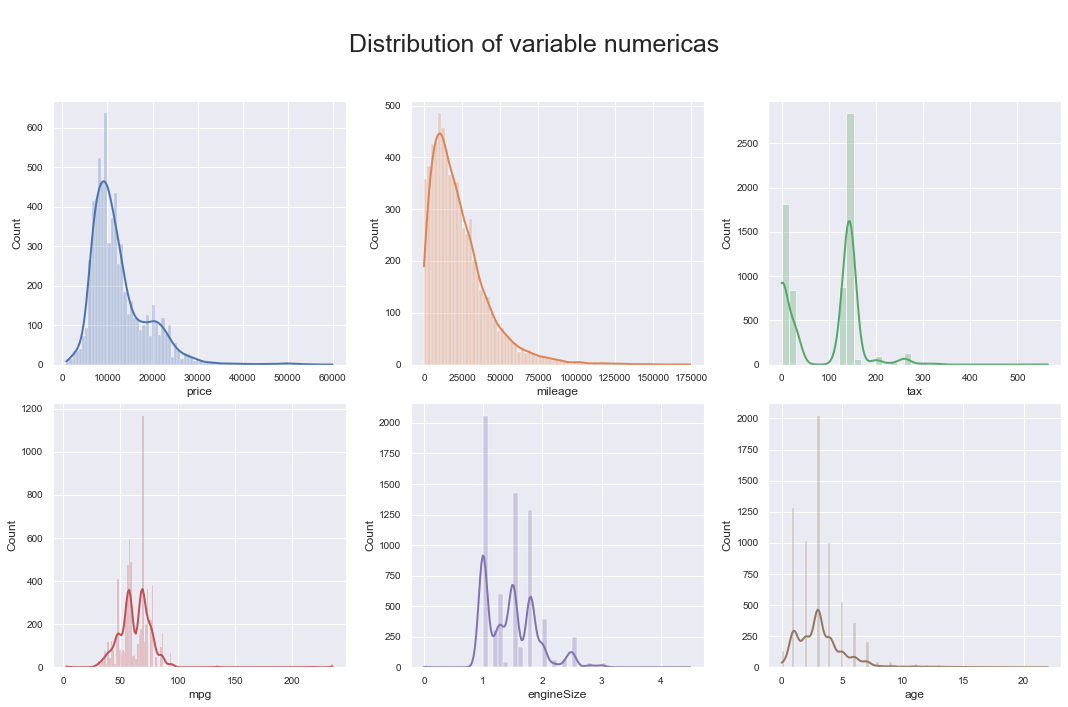

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flat
columnas_numeric = car_info_describe.select_dtypes(include= ['float64', 'int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = car_info_describe,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].tick_params(labelsize = 10)
    
fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('\nDistribution of variable numericas', fontsize = 25)

As we can see, the variables do not follow a normal distribution but show skewness,  double or three peaks in some cases. Therefore, they are not symmetric either.

Later, in the training part of the models, we will have to normalise the dataset due to the different sizes of the variables and the bias of each variable.

### Part 1.3.4 Correlation of Neumeric Variables

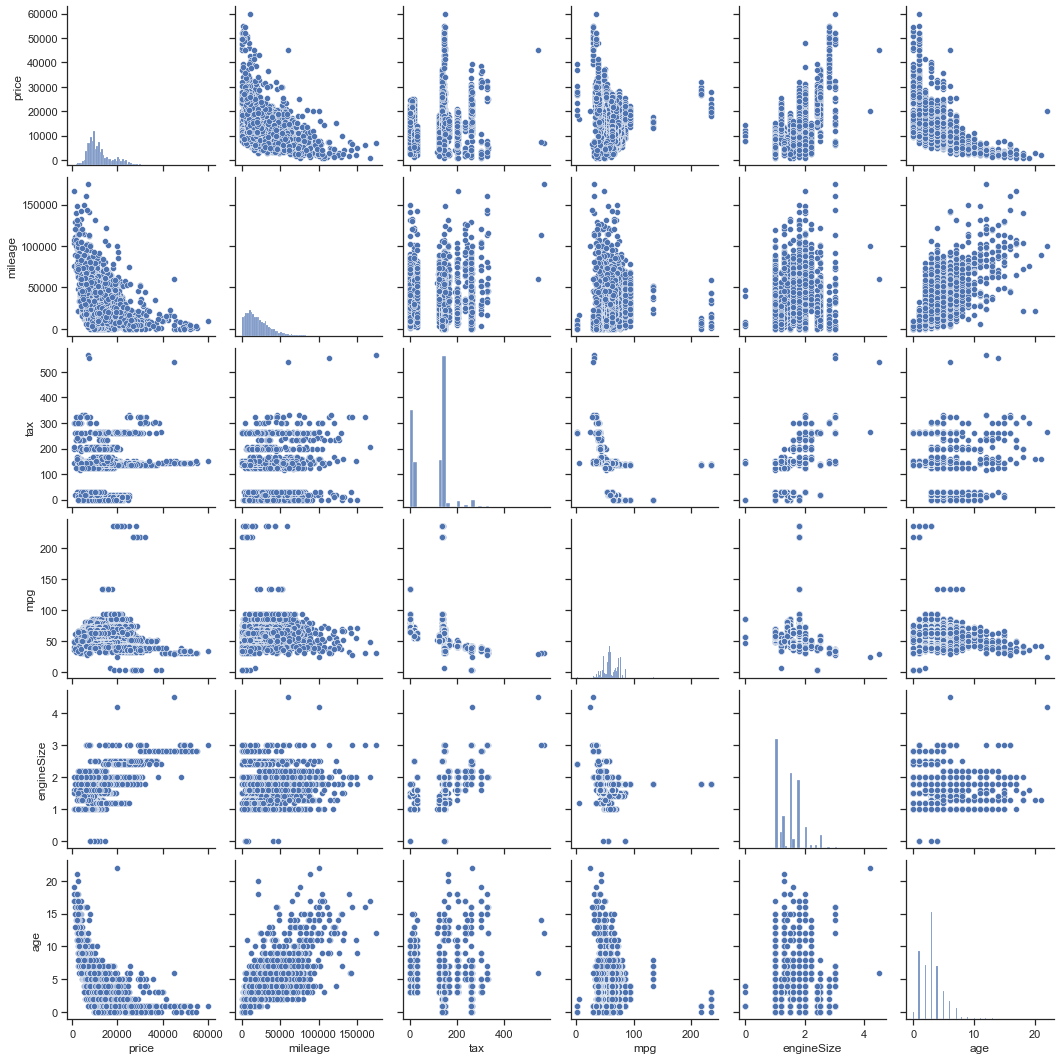

In [ ]:
sns.set(style="ticks", color_codes=True)

sns.pairplot(car_info_describe)

plt.show()

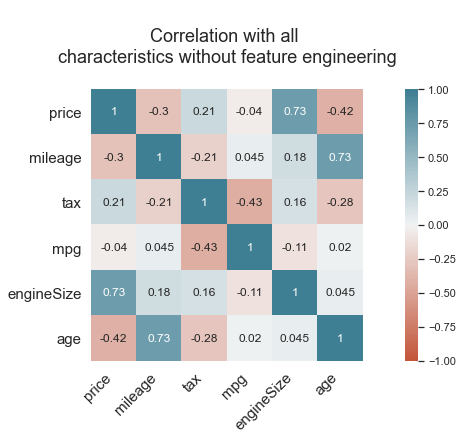

In [ ]:
# correlation heat map of numerical features

sns.set()

numCol = []
for col in car_sale:
  if car_info_describe[col].dtype == 'float' or car_info_describe[col].dtype == 'int':
    numCol.append(col)
corr = car_info_describe[numCol].corr()

ax = sns.heatmap(
    corr, 
    annot = True,
    cbar = True,
    annot_kws={"size": 12},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, 
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=360)

ax.set_title("\nCorrelation with all \ncharacteristics without feature engineering\n", size = 18)
ax.tick_params(labelsize = 15)

There are some tasks that we have to try to answer in this case. We have to explore the relation between the target and the features :

* The correlation value between price and engine size is 0.73, which is make sense since new car with bigger engine sold more expensive.
* The correlation value between price and age is -0.42, suggesting that old car is cheap. This is consistent with our previous analysis in Part 1.2.1.
* The correlation value between age and mileage is 0.73, which is make sense as old cars normally have high mileages.



# Part 2: Data cleaning and Feature Preprocessing

## Part 2.1 Data cleaning

In [ ]:
# copy car_sale dataset to car_sale_df and check the dataset 
car_sale_df = car_sale.copy()

In [ ]:
car_sale_df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,GT86,16000,Manual,24089,Petrol,265,36.2,2.0,4
1,GT86,15995,Manual,18615,Petrol,145,36.2,2.0,3
2,GT86,13998,Manual,27469,Petrol,265,36.2,2.0,5
3,GT86,18998,Manual,14736,Petrol,150,36.2,2.0,3
4,GT86,17498,Manual,36284,Petrol,145,36.2,2.0,3


In [ ]:
car_sale_df.shape

(6734, 9)

### Part 2.1.1 Format the model name

There is a space in each model name, which generate incontinence for further operation, so I replaced the model name with the no-space model name.

In [ ]:
car_sale_df[car_sale_df['model'] == ' Urban Cruiser']

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
6734,Urban Cruiser,4985,Manual,36154,Petrol,125,50.4,1.3,9
6735,Urban Cruiser,4995,Manual,46000,Diesel,125,57.6,1.4,8
6736,Urban Cruiser,3995,Manual,60700,Petrol,125,50.4,1.3,9
6737,Urban Cruiser,4495,Manual,45128,Petrol,125,50.4,1.3,9


In [ ]:
for i in range(car_sale_df.shape[0]+4):
    if i in [459, 4283, 4516, 5488]:
        continue
    else:
        model_name = car_sale_df.loc[i,'model'].strip()
        car_sale_df.loc[i,'model'] = model_name
    
car_sale_df['model'].unique()

array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACE VERSO',
       'Land Cruiser', 'Supra', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser'],
      dtype=object)

### Part 2.1.2 Correct the Transmission Record

As some cars are maked Other within transmission based on the analysis in Part 1.2.4. I check out the transmission type of the same model car in same year.

In [ ]:
car_other_transmission = car_sale_df[car_sale_df['transmission'] == 'Other']
car_other_transmission.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
2458,Yaris,12795,Other,16733,Hybrid,0,78.0,1.5,5


In [ ]:
yaris_transmission_2015 = car_sale_df[(car_sale_df['model'] == 'Yaris') & (car_sale_df['age'] == 5)]
yaris_transmission_2015_grp = yaris_transmission_2015[yaris_transmission_2015['transmission'] != None].groupby(by =['transmission'])

yaris_transmission_2015_grp.describe()

price                                                         \
             count          mean          std      min       25%      50%   
transmission                                                                
Automatic     90.0  10317.822222  1152.657014   7999.0   9523.75  10292.5   
Manual        80.0   7376.437500   744.569859   5850.0   6990.00   7298.0   
Other          1.0  12795.000000          NaN  12795.0  12795.00  12795.0   

                               mileage                                       \
                  75%      max   count          mean           std      min   
transmission                                                                  
Automatic     10998.0  12995.0    90.0  31962.422222  14796.696696   7155.0   
Manual         7766.5   9300.0    80.0  31577.600000  10357.674510   7144.0   
Other         12795.0  12795.0     1.0  16733.000000           NaN  16733.0   

                                                     tax             \
                   25%      50%       75%      max count       mean   
transmission                                                          
Automatic     19991.25  29614.5  41702.75  76517.0  90.0   5.666667   
Manual        23455.25  31035.0  40332.00  60257.0  80.0  23.625000   
Other         16733.00  16733.0  16733.00  16733.0   1.0   0.000000   

                                                       mpg             \
                    std  min   25%   50%   75%   max count       mean   
transmission                                                            
Automatic     11.808395  0.0   0.0   0.0   0.0  30.0  90.0  76.207778   
Manual        12.349730  0.0  30.0  30.0  30.0  30.0  80.0  59.092500   
Other               NaN  0.0   0.0   0.0   0.0   0.0   1.0  78.000000   

                                                     engineSize            \
                   std   min   25%   50%   75%   max      count      mean   
transmission                                                                
Automatic     9.800003  55.0  78.0  78.0  86.0  86.0       90.0  1.462222   
Manual        5.191394  55.0  55.0  58.0  58.0  80.7       80.0  1.246250   
Other              NaN  78.0  78.0  78.0  78.0  78.0        1.0  1.500000   

                                                  age                      \
                   std  min  25%  50%  75%  max count mean  std  min  25%   
transmission                                                                
Automatic     0.078723  1.3  1.5  1.5  1.5  1.5  90.0  5.0  0.0  5.0  5.0   
Manual        0.120067  1.0  1.3  1.3  1.3  1.4  80.0  5.0  0.0  5.0  5.0   
Other              NaN  1.5  1.5  1.5  1.5  1.5   1.0  5.0  NaN  5.0  5.0   

                             
              50%  75%  max  
transmission                 
Automatic     5.0  5.0  5.0  
Manual        5.0  5.0  5.0  
Other         5.0  5.0  5.0

In [ ]:
car_sale_df = car_sale_df[~car_sale_df['transmission'].str.contains('Other')]

car_other_transmission = car_sale_df[car_sale_df['transmission'] == 'Other']
car_other_transmission.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age


Because there are automatic and manual transmission for 2015 Yaris, we cannot correct the record. Since there is only one record, and it will generate one feature column if we perform the label encoding in the following model training, we delete this record.  

### Part 2.1.3 Correct the Engine size

There are some records showing 0 engine from analysis Part 1.3.2, indicating wrong record with engine size. I first filter out these records, and then check the engine size of the cars with same model built in same year. Combining the information from Wikipedia, I manually correct these engine size.

In [ ]:
# investigate the engine size

car_sale_df['engineSize'].unique()

array([2. , 1.8, 1.2, 1.6, 1.4, 2.5, 2.2, 1.5, 1. , 1.3, 0. , 2.4, 3. ,
       2.8, 4.2, 4.5])

In [ ]:
record_engineSize_0 = car_sale_df[car_sale['engineSize'] == 0]

print("There are total {} records showing zero engine.".format(record_engineSize_0.shape[0]))

record_engineSize_0

There are total 6 records showing zero engine.


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
2535,Yaris,12300,Manual,6148,Hybrid,0,86.0,0.0,4
2545,Yaris,11000,Automatic,39909,Hybrid,0,86.0,0.0,4
5126,Aygo,9800,Manual,3635,Petrol,150,56.5,0.0,1
5233,Aygo,8000,Manual,8531,Petrol,145,56.5,0.0,1
5257,Aygo,8000,Manual,5354,Petrol,145,56.5,0.0,1
5960,C-HR,14300,Manual,46571,Petrol,145,47.1,0.0,3


In [ ]:
yaris_engine_size_2016 = car_sale_df[(car_sale_df['model'] == 'Yaris') & (car_sale_df['age'] == 4)]
yaris_engine_2016_grp = yaris_engine_size_2016[yaris_engine_size_2016['engineSize'] != 0].groupby(by =['engineSize'])

yaris_engine_2016_grp.describe()

price                                                        \
            count          mean          std     min       25%      50%   
engineSize                                                                
1.0          20.0   7223.050000   825.900751  5980.0   6493.75   7298.0   
1.3         161.0   8953.801242  1073.177716  6987.0   8000.00   8982.0   
1.4           4.0   6844.750000   946.703183  5490.0   6543.75   7195.0   
1.5         130.0  11907.000000  1228.777227  8899.0  11000.00  11795.0   

                              mileage                                       \
                 75%      max   count          mean           std      min   
engineSize                                                                   
1.0          7551.75   8895.0    20.0  29418.250000  14467.702094   8246.0   
1.3          9498.00  13690.0   161.0  23866.956522  10821.856149   2700.0   
1.4          7496.00   7499.0     4.0  50145.750000  13120.312303  40254.0   
1.5         12686.25  15895.0   130.0  25336.707692  13703.471731   3342.0   

                                                    tax                    \
                 25%      50%       75%      max  count  mean   std   min   
engineSize                                                                  
1.0         17750.25  26894.0  41564.25  52667.0   20.0   0.0   0.0   0.0   
1.3         16197.00  23173.0  30233.00  63965.0  161.0  30.0   0.0  30.0   
1.4         40310.25  46164.5  56000.00  68000.0    4.0   5.0  10.0   0.0   
1.5         15123.75  22181.0  33605.50  83288.0  130.0   0.0   0.0   0.0   

                                      mpg                                     \
             25%   50%   75%   max  count       mean       std   min     25%   
engineSize                                                                     
1.0          0.0   0.0   0.0   0.0   20.0  66.000000  0.000000  66.0  66.000   
1.3         30.0  30.0  30.0  30.0  161.0  56.754037  1.480751  55.0  55.000   
1.4          0.0   0.0   5.0  20.0    4.0  78.625000  4.150000  72.4  78.625   
1.5          0.0   0.0   0.0   0.0  130.0  82.023077  3.993629  78.0  78.000   

                                 age                                     
              50%   75%   max  count mean  std  min  25%  50%  75%  max  
engineSize                                                               
1.0         66.00  66.0  66.0   20.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
1.3         58.00  58.0  58.0  161.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
1.4         80.70  80.7  80.7    4.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0  
1.5         82.25  86.0  86.0  130.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0

In [ ]:
pd.pivot_table(yaris_engine_size_2016[yaris_engine_size_2016['engineSize'] != 0], index=['transmission'])

,age,engineSize,mileage,mpg,price,tax
transmission,,,,,,
Automatic,4,1.466667,24490.692308,77.771795,11655.282051,5.000000
Manual,4,1.264780,25816.050314,58.506289,8447.094340,25.597484


In [ ]:
# Based on the information from the dataset and internet https://indianautosblog.com/2016-toyota-yaris-uk-xyz-p206277, 
# we replace the data point car_sale_df.loc[2535,'engineSize'] with 1.3 and car_sale_df.loc[2545,'engineSize'] with 1.5

car_sale_df.loc[2535,'engineSize'] = 1.3
car_sale_df.loc[2545,'engineSize'] = 1.5

record_engineSize_check = car_sale_df[car_sale_df['engineSize'] == 0]
record_engineSize_check.shape

(4, 9)

In [ ]:
# check the real engine size of aygo in 2019.

aygo_engine_size_2019 = car_sale_df[(car_sale_df['model'] == 'Aygo') & (car_sale_df['age'] == 1)]
aygo_engine_2019_grp = aygo_engine_size_2019[aygo_engine_size_2019['engineSize'] != 0].groupby(by =['engineSize'])

aygo_engine_2019_grp.describe()

price                                                            \
            count         mean         std     min     25%     50%      75%   
engineSize                                                                    
1.0         373.0  9820.270777  972.281028  6999.0  9170.0  9800.0  10350.0   

                    mileage                                                 \
                max   count         mean          std  min     25%     50%   
engineSize                                                                   
1.0         12999.0   373.0  4694.174263  4272.646697  3.0  1599.0  3589.0   

                               tax                                             \
               75%      max  count        mean       std    min    25%    50%   
engineSize                                                                      
1.0         6680.0  32943.0  373.0  145.643432  1.676511  145.0  145.0  145.0   

                            mpg                                               \
              75%    max  count       mean       std   min   25%   50%   75%   
engineSize                                                                     
1.0         145.0  150.0  373.0  56.943432  0.697145  55.4  56.5  56.5  57.7   

                    age                                     
             max  count mean  std  min  25%  50%  75%  max  
engineSize                                                  
1.0         57.7  373.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
# Based on the information from the dataset and internet https://www.car.info/en-se/toyota/aygo/aygo-5-door-10-vvt-i-2019-16984455/specs, 
# we replace the engineSize 0 with 1.0 in the record 5126, 5233, 5257.

car_sale_df.loc[[5126, 5233, 5257],'engineSize'] = 1.0
record_engineSize_check = car_sale_df[car_sale_df['engineSize'] == 0]
record_engineSize_check.shape

(1, 9)

In [ ]:
# check the real engine size of C-HR in 2017.

chr_engine_size_2017 = car_sale_df[(car_sale_df['model'] == 'C-HR') & (car_sale_df['age'] == 3)]
chr_engine_2017_grp = chr_engine_size_2017[chr_engine_size_2017['engineSize'] != 0].groupby(by =['engineSize'])

chr_engine_2017_grp.describe()

price                                                         \
            count          mean          std      min       25%      50%   
engineSize                                                                 
1.2          64.0  15979.687500  1677.921862  11995.0  14961.25  15998.0   
1.8         149.0  20040.651007  1645.776576  14392.0  19300.00  20395.0   

                             mileage                                      \
                75%      max   count          mean           std     min   
engineSize                                                                 
1.2         17336.0  18998.0    64.0  23125.906250  10350.011224  3920.0   
1.8         21000.0  22995.0   149.0  24585.456376  13125.283139  5643.0   

                                                    tax              \
                25%      50%       75%       max  count        mean   
engineSize                                                            
1.2         15976.0  23470.0  29574.25   56382.0   64.0  147.421875   
1.8         16250.0  22191.0  30141.00  106470.0  149.0   54.932886   

                                                            mpg             \
                  std    min    25%    50%    75%    max  count       mean   
engineSize                                                                   
1.2          3.983317  145.0  145.0  145.0  150.0  165.0   64.0  47.015625   
1.8         67.144928    0.0    0.0    0.0  135.0  140.0  149.0  74.300000   

                                                          age                 \
                     std   min   25%   50%   75%   max  count mean  std  min   
engineSize                                                                     
1.2         1.027591e+00  44.8  47.1  47.1  47.9  47.9   64.0  3.0  0.0  3.0   
1.8         1.425878e-14  74.3  74.3  74.3  74.3  74.3  149.0  3.0  0.0  3.0   

                                
            25%  50%  75%  max  
engineSize                      
1.2         3.0  3.0  3.0  3.0  
1.8         3.0  3.0  3.0  3.0

In [ ]:
pd.pivot_table(chr_engine_size_2017[chr_engine_size_2017['engineSize'] != 0], index=['transmission'])

,age,engineSize,mileage,mpg,price,tax
transmission,,,,,,
Automatic,3,1.735329,23932.203593,71.268862,19768.748503,65.059880
Manual,3,1.200000,24926.369565,47.343478,15377.739130,146.847826


In [ ]:
# Based on the information from the dataset and internet https://www.parkers.co.uk/toyota/c-hr/suv-2017/design-12-vvt-i-turbo-5d/specs/, 
# we replace the engineSize 0 with 1.2 in the record 5.

car_sale_df.loc[5960,'engineSize'] = 1.2
record_engineSize_check = car_sale_df[car_sale_df['engineSize'] == 0]
record_engineSize_check.shape

(0, 9)

Correct engine size:
    
* change engine size in 2535 and 2545 records (Yaris, 2016) to 1.3 and 1.5, respectively.
* change engine size in 5126, 5233, and 5257 records (Aygo, 2019) to 1.0.
* change engine size in 5960 record (C-HR, 2017) to 1.2.

### Part 2.1.4 Correct MPG

There are some records showing extremely low or high MPG from analysis Part 1.3.2. I first filter out these records, and then check the engine size of the cars with same model built in same year. 

In [ ]:
low_mpg_record = car_sale_df.sort_values(by=['mpg'])
low_mpg_record.head(15)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
6562,Hilux,18495,Manual,50,Diesel,260,2.8,2.4,0
6552,Hilux,28495,Automatic,3350,Diesel,260,2.8,2.4,1
6594,Hilux,39257,Automatic,1259,Diesel,265,2.8,2.4,0
6595,Hilux,27850,Automatic,10250,Diesel,260,2.8,2.4,1
6617,Hilux,36995,Automatic,150,Diesel,260,2.8,2.4,0
6575,Hilux,26500,Automatic,7123,Diesel,260,2.8,2.4,1
6596,Hilux,30500,Automatic,5000,Diesel,260,2.8,2.4,0
6563,Hilux,23495,Manual,100,Diesel,260,2.8,2.4,0
6583,Hilux,26995,Automatic,4,Diesel,265,2.8,2.4,1
6576,Hilux,20500,Manual,5190,Diesel,260,2.8,2.4,1


In [ ]:
# check Hilux mpg

hilux_mpg_2019_2020 = car_sale_df[(car_sale_df['model'] == 'Hilux') & (car_sale_df['age'].isin([0,1]))]
hilux_mpg_2019_2020['mpg'].unique()

array([ 2.8, 36.2, 40.4])

In [ ]:
pd.pivot_table(hilux_mpg_2019_2020, index=['mpg', 'transmission'])

age  engineSize       mileage         price  \
mpg  transmission                                                     
2.8  Automatic     0.571429         2.4   3876.571429  30941.714286   
     Manual        0.333333         2.4   1780.000000  20830.000000   
36.2 Automatic     1.000000         2.4  11720.666667  27488.500000   
40.4 Manual        1.000000         2.4  10184.125000  24301.125000   

                          tax  
mpg  transmission              
2.8  Automatic     261.428571  
     Manual        260.000000  
36.2 Automatic     260.000000  
40.4 Manual        261.875000

In [ ]:
car_sale_df.loc[[6595, 6583, 6594, 6596, 6617, 6575, 6552],'mpg'] = 36.2
car_sale_df.loc[[6562, 6576, 6563],'mpg'] = 40.4

hilux_mpg_2019_2020 = car_sale_df[(car_sale_df['model'] == 'Hilux') & (car_sale_df['age'].isin([0,1]))]
hilux_mpg_2019_2020['mpg'].unique()

array([36.2, 40.4])

In [ ]:
# check C-HR mpg

chr_mpg_2018 = car_sale_df[(car_sale_df['model'] == 'C-HR') & (car_sale_df['age'].isin([2]))]
chr_mpg_2018['mpg'].unique()

array([74.3, 44.8, 47.1, 47.9, 41.5, 34.5,  6. ])

In [ ]:
chr_mpg_2018['mpg'].value_counts()

74.3    106
47.9     14
47.1      7
41.5      7
34.5      3
44.8      1
6.0       1
Name: mpg, dtype: int64

In [ ]:
pd.pivot_table(chr_mpg_2018, index=['mpg', 'transmission','fuelType'])

age  engineSize       mileage         price  \
mpg  transmission fuelType                                                
6.0  Manual       Petrol      2         1.2  16429.000000  16690.000000   
34.5 Automatic    Petrol      2         1.2   6024.000000  20496.500000   
     Manual       Petrol      2         1.2  16200.000000  18999.000000   
41.5 Manual       Petrol      2         1.2  15554.142857  18011.142857   
44.8 Automatic    Petrol      2         1.2  14735.000000  20995.000000   
47.1 Manual       Petrol      2         1.2  19422.285714  17279.285714   
47.9 Automatic    Petrol      2         1.2  13266.500000  18023.500000   
     Manual       Petrol      2         1.2  15813.000000  15210.250000   
74.3 Automatic    Hybrid      2         1.8  17792.933962  21176.037736   

                                   tax  
mpg  transmission fuelType              
6.0  Manual       Petrol    145.000000  
34.5 Automatic    Petrol    147.500000  
     Manual       Petrol    150.000000  
41.5 Manual       Petrol    145.714286  
44.8 Automatic    Petrol    145.000000  
47.1 Manual       Petrol    145.714286  
47.9 Automatic    Petrol    145.500000  
     Manual       Petrol    146.250000  
74.3 Automatic    Hybrid    136.037736

In [ ]:
# Because there are different mpg for C-HR manual petrol in 2018, we use the average of C-HR manual petrol to replace the record 5966.

chr_mpg_manual_2018 = car_sale_df[(car_sale_df['transmission'] == 'Manual') & (car_sale_df['age'] == 2) & (car_sale_df['model'] == 'C-HR') & (car_sale_df['mpg'] != 6)]

car_sale_df.loc[5966,'mpg'] = chr_mpg_manual_2018['mpg'].mean()

car_sale_df.loc[5966,'mpg']

44.5421052631579

Correct MPG:
    
* correct seven and three mpg record (Hilux) from 2.8 to 36.2, 40.4, respectively.
* correct one mpg record (C-HR, 2018) from 6.0 to 44.5.

### Part 2.1.5 Remove outliers

In [ ]:
car_sale_df.shape

(6733, 9)

In [ ]:
car_sale_df.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age
0,GT86,16000,Manual,24089,Petrol,265,36.2,2.0,4
1,GT86,15995,Manual,18615,Petrol,145,36.2,2.0,3
2,GT86,13998,Manual,27469,Petrol,265,36.2,2.0,5
3,GT86,18998,Manual,14736,Petrol,150,36.2,2.0,3
4,GT86,17498,Manual,36284,Petrol,145,36.2,2.0,3


In [ ]:
upper_mileage = car_sale_df['mileage'].mean() + 3* car_sale_df['mileage'].std()
lower_mileage =  car_sale_df['mileage'].mean() -3* car_sale_df['mileage'].std()

car_sale_df_t1 = car_sale_df[(car_sale_df['mileage']<upper_mileage) & (car_sale_df['mileage']>lower_mileage)]

print('Upper threshold value for outlier in mileage is ', upper_mileage)
print('Lower threshold value for outlier in mileage is ', lower_mileage)
print('{} record has been removed from dataset based on outlier detection in mileage.'.format(len(car_sale_df) - len(car_sale_df_t1)))

upper_price = car_sale_df_t1['price'].mean() + 3* car_sale_df_t1['price'].std()
lower_price = car_sale_df_t1['price'].mean() -3* car_sale_df_t1['price'].std()

car_sale_df_t2 = car_sale_df_t1[(car_sale_df_t1['price']<upper_price) & (car_sale_df_t1['price']>lower_price)]
print("***************************************************************")
print('Upper threshold value for outlier in mileage is ', upper_price)
print('Lower threshold value for outlier in mileage is ', lower_price)
print('{} record has been removed from dataset based on outlier detection in mileage.'.format(len(car_sale_df_t1) - len(car_sale_df_t2)))
car_sale_df = car_sale_df_t2.copy()

Upper threshold value for outlier in mileage is  80239.27698682218
Lower threshold value for outlier in mileage is  -34510.110196387
112 record has been removed from dataset based on outlier detection in mileage.
***************************************************************
Upper threshold value for outlier in mileage is  31578.683959692702
Lower threshold value for outlier in mileage is  -6304.443814699496
76 record has been removed from dataset based on outlier detection in mileage.


Outlier remove:

* We remove outlier in price and mileage with 3 X Z-score method.
* 39 cars have been removed based on outlier detection in mileage.
* 76 cars have been removed based on outlier detection in price.

## Part 2.2 Feature Engineer

In [ ]:
car_sale_df.shape

(6545, 9)

### Part 2.2.1 Discontinue

Several model is discontinued in 2020. I add a column to indicate whether car is discontinued or not.

In [ ]:
car_sale_df['discontinue'] = car_sale_df['model']
car_sale_df['model'].unique()

array(['GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo', 'C-HR',
       'Prius', 'Avensis', 'Verso', 'Hilux', 'PROACE VERSO',
       'Land Cruiser', 'Camry', 'Verso-S', 'IQ', 'Urban Cruiser'],
      dtype=object)

In [ ]:
discontinue_model = ['Avensis', 'IQ', 'Verso', 'Urban Cruiser', 'Verso-S']
car_sale_df['discontinue'] = car_sale_df['discontinue'].map(lambda x: 'discontinue' if x in discontinue_model else 'continue')
car_sale_df['discontinue'].value_counts()

continue       6319
discontinue     226
Name: discontinue, dtype: int64

Model Avensis, IQ, Verso, Urban Cruiser, and Verso-S (total 240) are marked as discontinue, while other models are marked as continue

### Part 2.2.2 Model transfer 

I notice there are the available number for six models is less then 20, so I combine these record and name it as other for model.

In [ ]:
model_small_number = ['PROACE VERSO', 'Supra', 'Camry', 'IQ', 'Urban Cruiser', 'Verso-S']
minor_model = car_sale_df[car_sale_df['model'].isin(model_small_number)]
minor_model['model'] = 'other'
minor_model.shape

(39, 10)

In [ ]:
major_model = car_sale_df[~car_sale_df['model'].isin(model_small_number)]
major_model.shape

(6506, 10)

In [ ]:
car_sale_df2 = pd.concat([minor_model, major_model])
car_sale_df2['model'].value_counts()

Yaris           2098
Aygo            1951
Auris            697
C-HR             478
RAV4             429
Corolla          261
Prius            222
Verso            109
Avensis          102
Hilux             77
GT86              72
other             39
Land Cruiser      10
Name: model, dtype: int64

In [ ]:
# Double check the operation is correct
car_sale_df2.shape

(6545, 10)

Summary for model transform: 

* We named the model of 53 cars from 6 different models with list number less than 20 to other in model column.

### Part 2.2.3 Transform categorical features to numerical data

In [ ]:
car_sale_df2['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [ ]:
car_sale_df2['transmission'] = (
                            np.select(
                            condlist=[car_sale_df2['transmission'] == 'Manual', car_sale_df2['transmission'] == 'Semi-Auto', car_sale_df2['transmission'] == 'Automatic'], 
                            choicelist=[0, 1, 2], 
                            default=3))

car_sale_df2['transmission'].value_counts()

0    3754
2    2570
1     221
Name: transmission, dtype: int64

In [ ]:
car_sale_df2['fuelType'].unique()

array(['Diesel', 'Hybrid', 'Petrol', 'Other'], dtype=object)

In [ ]:
car_sale_df2['fuelType'] = (
                            np.select(
                            condlist=[car_sale_df2['fuelType'] == 'Petrol', car_sale_df2['fuelType'] == 'Other', car_sale_df2['fuelType'] == 'Diesel', car_sale_df2['fuelType'] == 'Hybrid'], 
                            choicelist=[0, 1, 2, 3], 
                            default=4))

car_sale_df2['fuelType'].value_counts()

0    4025
3    1997
2     420
1     103
Name: fuelType, dtype: int64

In [ ]:
#category_feature = ['model', 'transmission','fuelType', 'discontinue']

category_feature = ['model', 'discontinue']

car_sale_df2 = pd.get_dummies(car_sale_df2, category_feature)
car_sale_df2.head(5)

,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Corolla,model_GT86,model_Hilux,model_Land Cruiser,model_Prius,model_RAV4,model_Verso,model_Yaris,model_other,discontinue_continue,discontinue_discontinue
6634,27998,2,5,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6635,27998,2,10,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6636,27998,2,240,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6637,24498,0,588,2,145,40.4,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6638,27998,2,50,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


We encode category features as follows steps:

* encode Manual, Semi-Auto, Automatic as 0, 1, 2 for transmission column.
* encode Petrol, Other, Diesel, Hybrid as 0, 1, 2, 3 in fuelType column.
* encode model name with get_dummies method.

### Part 2.3 Data Split


In [ ]:
# Get target variable

y = car_sale_df2['price']

In [ ]:
X = car_sale_df2.drop(['price'], axis=1)
X.head(5)

,transmission,mileage,fuelType,tax,mpg,engineSize,age,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Corolla,model_GT86,model_Hilux,model_Land Cruiser,model_Prius,model_RAV4,model_Verso,model_Yaris,model_other,discontinue_continue,discontinue_discontinue
6634,2,5,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6635,2,10,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6636,2,240,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6637,0,588,2,145,40.4,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6638,2,50,2,145,38.7,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
# split data into training and testing

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Traning data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features.')
print('Test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features.')

Traning data has 5236 observation with 22 features.
Test data has 1309 observation with 22 features.


In [ ]:
X_train.head()

,transmission,mileage,fuelType,tax,mpg,engineSize,age,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Corolla,model_GT86,model_Hilux,model_Land Cruiser,model_Prius,model_RAV4,model_Verso,model_Yaris,model_other,discontinue_continue,discontinue_discontinue
2448,2,39000,0,145,48.7,1.3,13,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2269,2,5626,0,30,58.0,1.3,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5882,2,17000,3,135,74.3,1.8,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4710,0,3992,0,145,57.7,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3341,2,36453,3,0,72.4,1.8,6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Since we have a small dataset, we try different test_size, including 0.1 and 0.20. However, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Because of the R square value does not change much with training data, we decided to use 75/25 ratio for train_test_split.

### Part 2.2.4 Standardization

In [ ]:
# We use standardscaler to treat columns, milage, mpg, tax_rate
scaler = StandardScaler()

scaler.fit(X_train[['mileage', 'mpg', 'tax', 'age', 'engineSize']])
X_train[['mileage', 'mpg', 'tax', 'age', 'engineSize']] = scaler.transform(X_train[['mileage', 'mpg', 'tax', 'age', 'engineSize']])
X_test[['mileage', 'mpg', 'tax', 'age', 'engineSize']] = scaler.transform(X_test[['mileage', 'mpg', 'tax', 'age', 'engineSize']])

In [ ]:
# check the X_train
X_train.head()

,transmission,mileage,fuelType,tax,mpg,engineSize,age,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Corolla,model_GT86,model_Hilux,model_Land Cruiser,model_Prius,model_RAV4,model_Verso,model_Yaris,model_other,discontinue_continue,discontinue_discontinue
2448,2,1.085970,0,0.718725,-0.958970,-0.379682,5.113034,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2269,2,-0.999852,0,-0.875224,-0.360451,-0.379682,-0.079132,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5882,2,-0.288995,3,0.580121,0.688567,0.838613,-0.598349,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4710,0,-1.101975,0,0.718725,-0.379758,-1.110658,-1.117565,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3341,2,0.926786,3,-1.291036,0.566289,0.838613,1.478518,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_test.head()

,transmission,mileage,fuelType,tax,mpg,engineSize,age,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Corolla,model_GT86,model_Hilux,model_Land Cruiser,model_Prius,model_RAV4,model_Verso,model_Yaris,model_other,discontinue_continue,discontinue_discontinue
3706,0,-0.842106,0,0.788027,0.341040,-1.110658,-0.079132,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2103,0,0.389425,0,0.788027,-0.302530,0.107636,-0.598349,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2240,0,-0.682673,0,0.718725,-1.010456,0.107636,-1.117565,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
5757,2,-0.875231,3,0.580121,0.688567,0.838613,-1.117565,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2543,0,0.116432,0,-0.875224,-0.360451,-0.379682,0.959301,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


We use the standard scaler to resize the distribution of values in mileage, mpg, tax, age, and engine size. 

# Part 3: Model Development and Evaluation

## Part 3.1: Model Selection

In [ ]:
# Logistic Regression
regressor_LinearRegression = LinearRegression()

# Ridge Regression
regressor_Ridge = Ridge()

# Lasso Regression
regressor_Lasso = Lasso()

# k Nearest Neighbors
regressor_KNN = KNeighborsRegressor()

# Random Forest
regressor_RF = RandomForestRegressor()

# XGBoost
regressor_XGB = XGBRegressor()

In [ ]:
# use 5-fold Cross Validation to get the accuracy for different models

model_names = ['LinearRegression','Ridge','Lasso', 'KNN', 'RF', 'XGB']
model_list = [regressor_LinearRegression, regressor_Ridge, regressor_Lasso, regressor_KNN, regressor_RF, regressor_XGB]
count = 0

for classifier in model_list:
  cv = KFold(n_splits = 5, shuffle=True, random_state=1)
  cv_score = cross_val_score(classifier, X_train, y_train, cv = cv, scoring = 'r2')
  print(cv_score)
  print(model_names[count] + ' has an r2 score: ' + str(cv_score.mean().round(5)))
  print("Standard deviation of " + model_names[count] + ' is ' + str(np.std(cv_score).round(5)) + "\n")
  count += 1

[0.93153537 0.93651797 0.92699425 0.93710242 0.9293047 ]
LinearRegression has an r2 score: 0.93229
Standard deviation of LinearRegression is 0.00396

[0.9311207  0.93669988 0.92665571 0.93651738 0.92944323]
Ridge has an r2 score: 0.93209
Standard deviation of Ridge is 0.00396

[0.93127782 0.93664398 0.92714484 0.93636736 0.92946885]
Lasso has an r2 score: 0.93218
Standard deviation of Lasso is 0.00377

[0.95355298 0.95384895 0.95128255 0.95785342 0.94966637]
KNN has an r2 score: 0.95324
Standard deviation of KNN is 0.00277

[0.96152139 0.95934292 0.95692237 0.96330672 0.95978367]
RF has an r2 score: 0.96018
Standard deviation of RF is 0.00215

[0.96269559 0.95990486 0.96010583 0.96466425 0.96356816]
XGB has an r2 score: 0.96219
Standard deviation of XGB is 0.00189



In [ ]:
count = 0
for classifier in model_list:
  cv = KFold(n_splits = 5, shuffle=True, random_state=1)
  cv_score = cross_val_score(classifier, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error')
  print(cv_score)
  print(model_names[count] + ' has an RMSE score: ' + str(cv_score.mean().round(5)))
  print("Standard deviation of " + model_names[count] + ' is ' + str(np.std(cv_score).round(5)) + "\n")
  count += 1

[-2045952.29680885 -1923171.67281494 -2177348.20519101 -1832971.10001107
 -2314354.4105651 ]
LinearRegression has an RMSE score: -2058759.53708
Standard deviation of LinearRegression is 172580.71979

[-2058344.01777866 -1917660.74330931 -2187444.74639271 -1850020.3228285
 -2309819.2660289 ]
Ridge has an RMSE score: -2064657.81927
Standard deviation of Ridge is 169055.03468

[-2053648.72642388 -1919354.38434117 -2172856.97603245 -1854392.41132039
 -2308980.32614225]
Lasso has an RMSE score: -2061846.56485
Standard deviation of Lasso is 165412.73182

[-1387992.37751908 -1398134.22403056 -1452965.79396371 -1228242.37486151
 -1647773.5182426 ]
KNN has an RMSE score: -1423021.65772
Standard deviation of KNN is 135052.17804

[-1142872.72668982 -1217405.32596501 -1275375.93110354 -1086817.99036022
 -1307594.26331606]
RF has an RMSE score: -1206013.24749
Standard deviation of RF is 81797.18674

[-1114780.75659522 -1214672.03905846 -1189817.09355503 -1029759.8502752
 -1192670.20749066]
XGB has 

Model selection:
* We employ 5 fold cross validation for model training and evaluation.
* We use both R square and mean square error to evaluate model performance.
* We compare the preformance of six regression models, including linear regression, Lasso, Ridge, K nearest neighbors, Random Forest, and XGBoost regressor.
* XGBRegressor has the best performance. We will then use XGBRegressor for the prediction.

## Part 3.2: Tuning Hyperparameters - XGBooster

In [ ]:
# UDF training curve

def training_curve(Regressor):
    train_sizes, train_scores, test_scores = \
                    learning_curve(estimator=Regressor(random_state = 1),
                                   X=X_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=5,
                                   scoring = 'r2')

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_std = test_scores.std(axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.rc('figure', figsize=(8, 4))
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('R square')
    plt.legend(loc='lower right')
    plt.ylim([0.5, 1.5])
    plt.tight_layout()
    plt.show()

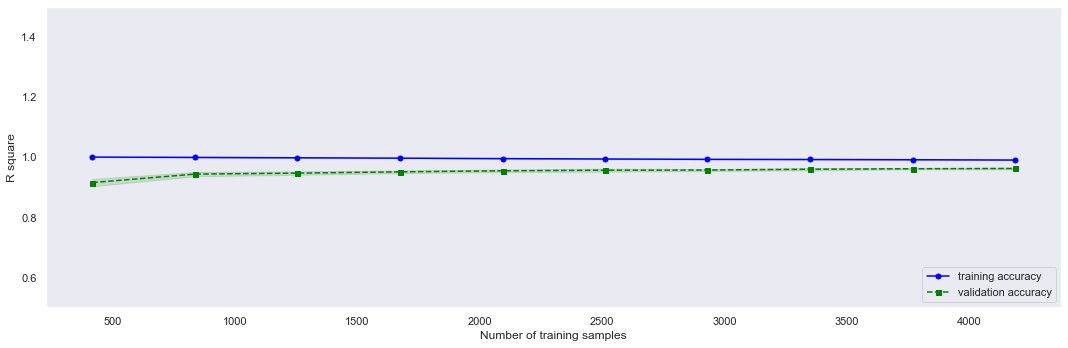

In [ ]:
training_curve(XGBRegressor)

In [ ]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
# Number of trees in the forest
n_estimators = [100, 150, 200]

# Define some paramters
parameters = {'n_estimators': n_estimators}

Grid_XGB = GridSearchCV(XGBRegressor(),parameters, cv=5)
Grid_XGB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [ ]:
# helper function for printing out grid search results
def print_grid_search_metrics(gs):
  print("Best score: " + str(gs.best_score_))
  print("Best parameters set: ")
  best_parameters = gs.best_params_
  for param_name in sorted(best_parameters.keys()):
    print(param_name + ':' + str(best_parameters[param_name]))
    
print_grid_search_metrics(Grid_XGB)

Best score: 0.9623724319535008
Best parameters set: 
n_estimators:100


In [ ]:
# best model

best_XGB_model = Grid_XGB.best_estimator_
best_XGB_model.score(X_test, y_test)

0.9553772167343962

Text(0, 0.5, 'Real')

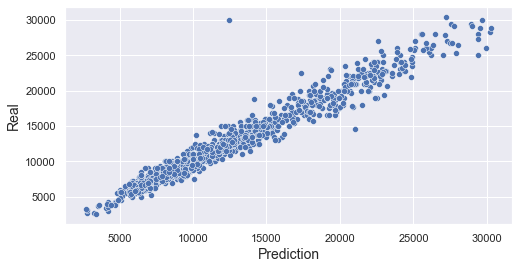

In [ ]:
pred = best_XGB_model.predict(X_test)

sns.scatterplot(pred, y_test)
plt.xlabel('Prediction', fontsize = 14)
plt.ylabel('Real', fontsize = 14)


Conclusion:
- We see that the XGBoost regression model gives the best prediction for this dataset.
- The distributions of points between the predicted and the real are more limited to the central line in the models of group 2.
- It should be noticed that we have not try more combination with grid search for XGBoost model, since the tuning takes long time.

## Part 3.3: Feature Importance Analysis

In [ ]:
#evaluate feature importance based on pearson correlation

corr_mat = car_sale_df.corr(method='pearson')
sorted_mat = corr_mat.unstack().sort_values()
correlations = pd.DataFrame(sorted_mat).reset_index() # Convert to dataframe
correlations.columns = ['price', 'feature', 'correlation'] # Label it
correlations = correlations.query("price == 'price' & feature != 'price'") # Filter by variable
correlations['correlation'] = abs(correlations['correlation'])
correlations.sort_values(by='correlation', ascending= False)

,price,feature,correlation
28,price,engineSize,0.738921
2,price,age,0.411348
9,price,mileage,0.260540
25,price,tax,0.220968
15,price,mpg,0.042194


In [ ]:
XGB_feature_importance = pd.DataFrame(best_XGB_model.feature_importances_, index=X_train.columns, columns=['Feature Importance (XGB)'])
XGB_feature_importance = XGB_feature_importance.sort_values(by='Feature Importance (XGB)',ascending=False)
XGB_feature_importance.head(10)

,Feature Importance (XGB)
engineSize,0.685939
age,0.083219
model_Auris,0.051098
discontinue_continue,0.044664
model_Prius,0.015919
transmission,0.014776
model_Avensis,0.014498
model_Yaris,0.013749
model_Corolla,0.012236
model_C-HR,0.010896


In [ ]:
XGB_PI = permutation_importance(best_XGB_model, X_test, y_test, n_repeats=5, random_state=1)

XGB_PI_res = pd.DataFrame(data=np.transpose([XGB_PI['importances_mean'],XGB_PI['importances_std']]), 
             index = X_test.columns,columns=['PI_mean','PI_std'])
XGB_PI_res = XGB_PI_res.sort_values(by='PI_mean',ascending=False)
XGB_PI_res.head(10)

,PI_mean,PI_std
engineSize,1.173864,0.055032
age,0.198516,0.018194
mpg,0.084975,0.002139
mileage,0.060097,0.003611
transmission,0.031254,0.002346
model_Auris,0.031166,0.001409
fuelType,0.010215,0.000506
discontinue_continue,0.007357,0.001123
tax,0.006739,0.000862
model_Prius,0.006465,0.001113


Feature importance:
* We use pearson correlation, model.feature_importance, and permutation importance to evaluate the top features which play key role in price prediction.
* The age and engine size of a car is the top features for price prediction. 

# Part 4: COMPARISON TO THE BUSINESS SUCCESS CRITERIA

In [ ]:
mapping = {'Predict':pred, 'Real':y_test}
pred_real_price = pd.DataFrame(mapping, columns=['Predict', 'Real'])
pred_real_price['Diff'] = abs(pred_real_price['Predict'] - pred_real_price['Real'])
pred_real_dif = pred_real_price.sort_values(by='Diff', ascending = False)
pred_real_dif.head(10)

,Predict,Real,Diff
6598,12422.499023,29990,17567.500977
6602,21048.023438,14598,6450.023438
5918,17324.824219,22495,5170.175781
2045,14158.761719,18868,4709.238281
648,22611.089844,27006,4394.910156
5690,29377.695312,24998,4379.695312
60,29961.826172,25995,3966.826172
6627,23028.556641,19350,3678.556641
5707,19320.638672,22995,3674.361328
6216,19363.435547,22890,3526.564453


In [ ]:
pred_real_diff_info = pred_real_dif.join(car_sale_df)
pred_real_diff_info.head(20)

,Predict,Real,Diff,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age,discontinue
6598,12422.499023,29990,17567.500977,Hilux,29990,Manual,52689,Diesel,260,38.7,2.5,4,continue
6602,21048.023438,14598,6450.023438,Hilux,14598,Manual,21381,Diesel,265,40.4,2.4,2,continue
5918,17324.824219,22495,5170.175781,C-HR,22495,Automatic,51800,Hybrid,0,74.3,1.8,3,continue
2045,14158.761719,18868,4709.238281,Yaris,18868,Automatic,9991,Hybrid,140,76.3,1.5,1,continue
648,22611.089844,27006,4394.910156,RAV4,27006,Automatic,13627,Hybrid,135,55.4,2.5,2,continue
5690,29377.695312,24998,4379.695312,C-HR,24998,Automatic,1379,Hybrid,140,54.3,2.0,1,continue
60,29961.826172,25995,3966.826172,GT86,25995,Manual,3250,Petrol,145,33.2,2.0,0,continue
6627,23028.556641,19350,3678.556641,Hilux,19350,Automatic,20758,Diesel,260,36.2,2.4,3,continue
5707,19320.638672,22995,3674.361328,C-HR,22995,Manual,2265,Petrol,145,41.5,1.2,1,continue
6216,19363.435547,22890,3526.564453,Prius,22890,Automatic,31786,Hybrid,135,235.0,1.8,2,continue


We combine prediction result with original record, which allows us to find that some interesting issues in original price. For example, record 6698 and 6602 both are Hilux, and 6598 is marked with £29,990 with 52,689 miles and 4 years old, however, record 6602, which is 2 years old and 21,381 miles, asks for £14,598. These original information need further investigate.

In [ ]:
wrong_pred = pred_real_price[pred_real_price['Diff'] > 1500].shape[0]/pred_real_price.shape[0]

print("The precentage of the prediction with over 1,500 different with real price is {}".format(wrong_pred))

The precentage of the prediction with over 1,500 different with real price is 0.11459129106187929


Conclusion:

* Although our model has good performance, based on R square analysis, it can't get all the difference between prediction and estimated price less than £1,500.

# Part 5: FUTURE WORKS

* Currently, there are only records in the dataset, and we use for prediction. It will be much helpful if we can get more data for model training.
* In current dataset, there are only 8 features. Better performance is achievable if more features (color, owner number, accident history, door number, and etc) are available. 
* Keeping the current model as a baseline, Using some advanced techniques algorithms to predict car prices as our future work.